Experience from this notebook:
- KMeansSMOTE oversampling is not applicable since it only works with `n_clusters=1`
- However, that works well since it has good generalization scores, so classic SMOTE oversampling is a good choice of algorithm
- For the number of neighbors, there is no best value

# Import and Prepare

In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_validate
# from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import fbeta_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans

from imblearn.over_sampling import KMeansSMOTE

In [2]:
CSV_FILE_PATH = '/content/drive/MyDrive/Colab Notebooks/AppStats Project/data.csv'

TEST_TO_ALL_SIZE = 0.125
VAL_TO_TRAIN_SIZE = 0.1
RANDOM_STATE = 42

np.random.seed(RANDOM_STATE)

In [3]:
df = pd.read_csv(CSV_FILE_PATH)
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [4]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


# Split into training set, validation set, and test set

In [5]:
y = (df['Bankrupt?']).to_numpy()
y

array([1, 1, 1, ..., 0, 0, 0])

In [6]:
X = df.drop('Bankrupt?', axis=1, inplace=False).to_numpy()
X

array([[0.37059426, 0.42438945, 0.40574977, ..., 0.56405011, 1.        ,
        0.01646874],
       [0.46429094, 0.53821413, 0.51673002, ..., 0.57017495, 1.        ,
        0.02079431],
       [0.42607127, 0.49901875, 0.47229509, ..., 0.56370608, 1.        ,
        0.01647411],
       ...,
       [0.47272461, 0.533744  , 0.52063815, ..., 0.5651584 , 1.        ,
        0.09764874],
       [0.50626432, 0.5599106 , 0.55404465, ..., 0.56530151, 1.        ,
        0.04400945],
       [0.49305319, 0.57010467, 0.54954762, ..., 0.56516694, 1.        ,
        0.23390224]])

In [7]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y,
        test_size=TEST_TO_ALL_SIZE, stratify=y,
        random_state=RANDOM_STATE)
print(  X_train_val.shape,
        X_test.shape,
        X_train_val.shape,
        y_test.shape
)

(5966, 95) (853, 95) (5966, 95) (853,)


In [8]:
X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val,
        test_size=VAL_TO_TRAIN_SIZE,
        stratify=y_train_val,
        random_state=RANDOM_STATE)
print(  X_train.shape,
        X_val.shape,
        y_train.shape,
        y_val.shape
)

(5369, 95) (597, 95) (5369,) (597,)


(array([0, 1]), array([6599,  220]))
(array([0, 1]), array([5196,  173]))
(array([0, 1]), array([578,  19]))
(array([0, 1]), array([825,  28]))


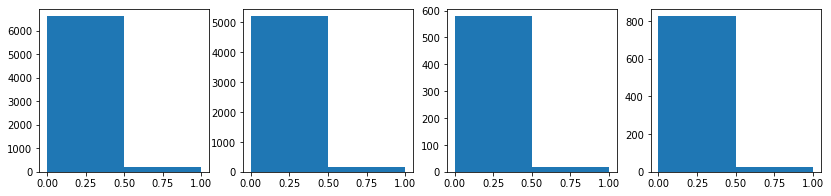

In [9]:
fig, ax = plt.subplots(1, 4)
fig.set_figheight(3)
fig.set_figwidth(14)

ax[0].hist(y, bins=2)
ax[1].hist(y_train, bins=2)
ax[2].hist(y_val, bins=2)
ax[3].hist(y_test, bins=2)

print(np.unique(y, return_counts=True))
print(np.unique(y_train, return_counts=True))
print(np.unique(y_val, return_counts=True))
print(np.unique(y_test, return_counts=True))

# Hand-tune KMeansSMOTE oversampling technique (generate different datasets from training set, evaluate f2 score of Random Forest on validation set)

In [10]:
def tune_KMeansSMOTE_clusters(n_values):
    for n in n_values:
        try:
            # generate new dataset
            kmeans_estimator = KMeans(n_clusters=n, random_state=RANDOM_STATE)
            X_train_oversampled, y_train_oversampled = \
                    KMeansSMOTE(
                        sampling_strategy=1,
                        random_state=RANDOM_STATE,
                        k_neighbors=3,
                        kmeans_estimator=kmeans_estimator,
                        #cluster_balance_threshold=0.0001
                    ).fit_resample(X_train, y_train)
            # create a random forest
            rfc = RandomForestClassifier(
                n_estimators=50,  # default=100
                bootstrap=False,  # default=True
                random_state=RANDOM_STATE
            )
            # evaluate the quality of the generated dataset
            rfc.fit(X_train_oversampled, y_train_oversampled)
            y_train_pred = rfc.predict(X_train)
            y_val_pred = rfc.predict(X_val)

            y_test_pred = rfc.predict(X_test)

            print(n,
                fbeta_score(y_train, y_train_pred, beta=2),
                fbeta_score(y_val, y_val_pred, beta=2),
                
                fbeta_score(y_test, y_test_pred, beta=2),
                )
            
            
        except Exception as e:
            print(e)

In [11]:
def tune_KMeansSMOTE_clusters_with_balance_threshold(n_values):
    for n in n_values:
        try:
            # generate new dataset
            kmeans_estimator = KMeans(n_clusters=n, random_state=RANDOM_STATE)
            X_train_oversampled, y_train_oversampled = \
                    KMeansSMOTE(
                        sampling_strategy=1,
                        random_state=RANDOM_STATE,
                        k_neighbors=3,
                        kmeans_estimator=kmeans_estimator,
                        cluster_balance_threshold=0.0001
                    ).fit_resample(X_train, y_train)
            # create a random forest
            rfc = RandomForestClassifier(
                n_estimators=50,  # default=100
                bootstrap=False,  # default=True
                random_state=RANDOM_STATE
            )
            # evaluate the quality of the generated dataset
            rfc.fit(X_train_oversampled, y_train_oversampled)
            y_train_pred = rfc.predict(X_train)
            y_val_pred = rfc.predict(X_val)

            y_test_pred = rfc.predict(X_test)

            print(n,
                fbeta_score(y_train, y_train_pred, beta=2),
                fbeta_score(y_val, y_val_pred, beta=2),
                
                fbeta_score(y_test, y_test_pred, beta=2),
                )
            
            
        except Exception as e:
            print(e)

In [12]:
def tune_KMeansSMOTE_neighbors(k_values):
    for k in k_values:
        try:
            # generate new dataset
            kmeans_estimator = KMeans(n_clusters=1, random_state=RANDOM_STATE)
            X_train_oversampled, y_train_oversampled = \
                    KMeansSMOTE(
                        sampling_strategy=1,
                        random_state=RANDOM_STATE,
                        k_neighbors=k,
                        kmeans_estimator=kmeans_estimator,
                        #cluster_balance_threshold=0.0001
                    ).fit_resample(X_train, y_train)
            # create a random forest
            rfc = RandomForestClassifier(
                n_estimators=50,  # default=100
                bootstrap=False,  # default=True
                random_state=RANDOM_STATE
            )
            # evaluate the quality of the generated dataset
            rfc.fit(X_train_oversampled, y_train_oversampled)
            y_train_pred = rfc.predict(X_train)
            y_val_pred = rfc.predict(X_val)

            y_test_pred = rfc.predict(X_test)

            print(k,
                fbeta_score(y_train, y_train_pred, beta=2),
                fbeta_score(y_val, y_val_pred, beta=2),
                
                fbeta_score(y_test, y_test_pred, beta=2),
                )
            
            
        except Exception as e:
            print(e)

In [13]:
values = np.unique(np.logspace(0, np.log10(100), num=15, base=10, dtype=int))
values

array([  1,   2,   3,   5,   7,  10,  13,  19,  26,  37,  51,  71, 100])

In [14]:
tune_KMeansSMOTE_clusters(values)

1 1.0 0.49450549450549447 0.40145985401459855
No clusters found with sufficient samples of class 1. Try lowering the cluster_balance_threshold or increasing the number of clusters.
No clusters found with sufficient samples of class 1. Try lowering the cluster_balance_threshold or increasing the number of clusters.
No clusters found with sufficient samples of class 1. Try lowering the cluster_balance_threshold or increasing the number of clusters.
No clusters found with sufficient samples of class 1. Try lowering the cluster_balance_threshold or increasing the number of clusters.
No clusters found with sufficient samples of class 1. Try lowering the cluster_balance_threshold or increasing the number of clusters.
No clusters found with sufficient samples of class 1. Try lowering the cluster_balance_threshold or increasing the number of clusters.
No clusters found with sufficient samples of class 1. Try lowering the cluster_balance_threshold or increasing the number of clusters.
No cluste

In [15]:
tune_KMeansSMOTE_clusters_with_balance_threshold(values)

1 1.0 0.49450549450549447 0.40145985401459855
2 1.0 0.17857142857142855 0.3358208955223881
3 1.0 0.18072289156626506 0.3174603174603174
5 1.0 0.06329113924050632 0.24793388429752064
7 1.0 0.24691358024691357 0.24999999999999997
10 1.0 0.125 0.17241379310344823
13 1.0 0.18072289156626506 0.2100840336134454
19 1.0 0.18518518518518517 0.21186440677966104
26 1.0 0.125 0.21186440677966104
37 1.0 0.24390243902439018 0.32786885245901637
51 1.0 0.12658227848101264 0.24793388429752064
71 1.0 0.0641025641025641 0.20833333333333334
100 1.0 0.3086419753086419 0.16806722689075626


In [16]:
tune_KMeansSMOTE_neighbors(values)

1 1.0 0.4651162790697674 0.33834586466165417
2 1.0 0.4022988505747126 0.33333333333333337
3 1.0 0.49450549450549447 0.40145985401459855
5 1.0 0.43956043956043955 0.47619047619047616
7 1.0 0.6043956043956044 0.5
10 1.0 0.5263157894736842 0.4934210526315789
13 1.0 0.7000000000000001 0.5519480519480519
19 1.0 0.5913978494623656 0.5882352941176471
26 1.0 0.5729166666666666 0.5194805194805195
37 1.0 0.5612244897959184 0.5298013245033112
51 1.0 0.5882352941176471 0.5483870967741935
71 1.0 0.5882352941176471 0.53125
100 1.0 0.707070707070707 0.49019607843137253
